In [13]:
"""
Extract stock price records from external API, to save as cookie jar bundle size data.
Use adjusted closing price.
"""

from finrl.marketdata.yahoodownloader import YahooDownloader
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
from stockstats import StockDataFrame
import yfinance as yf

START_DATE = '2010-01-01'
END_DATE = '2020-01-01'
# Dow 30 stocks as of Sept 2012
STOCK_NAMES = [
    'MMM', 'AA', 'AXP', 'T', 'BAC', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 
    'DD', 'XOM', 'GE', 'HPQ', 'HD', 'INTC', 'IBM', 'JNJ', 'JPM', 'MCD',
    'MRK', 'MSFT', 'PFE', 'PG', 'TRV', 'UNH', 'RTX', 'VZ', 'WMT', 'DIS',
]

In [14]:
# Pull stock data from yfinance, based on finrl's YahooDownloader implementation
buffer = 60  # num days of buffer to ensure moving averages are well formed by START_DATE
start_date = (pd.Timestamp(START_DATE) - pd.Timedelta(60, 'days')).strftime('%Y-%m-%d')
end_date = END_DATE
ticker_list = STOCK_NAMES

df = pd.DataFrame()
for tic in ticker_list:
    temp_df = yf.download(tic, start=start_date, end=end_date)
    temp_df["tic"] = tic
    df = df.append(temp_df)
# reset the index, we want to use numbers as index instead of dates
df = df.reset_index()
# convert the column names to standardized names
df.columns = [
    "date",
    "open",
    "high",
    "low",
    "regcp",
    "adjcp",
    "volume",
    "tic",
]
# df.rename(columns={'close': 'regcp'})  # regular close price

# create day of the week column (monday = 0)
df["day"] = df["date"].dt.dayofweek
# convert date to standard string format, easy to filter
df["date"] = df.date.apply(lambda x: x.strftime("%Y-%m-%d"))
# drop missing data
df = df.dropna()
df = df.reset_index(drop=True)

df = df.sort_values(by=['date','tic']).reset_index(drop=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [15]:
df['time_id'] = (pd.to_datetime(df.date) - pd.Timestamp(START_DATE)).apply(lambda x: x.days)
df

,date,open,high,low,regcp,adjcp,volume,tic,day,time_id
0,2009-11-02,30.133619,30.830490,29.076300,29.989441,27.590992,13010279,AA,0,-60
1,2009-11-02,34.950001,35.880001,34.630001,35.680000,29.772829,12571600,AXP,0,-60
2,2009-11-02,47.820000,48.410000,47.330002,48.270000,37.285347,5932500,BA,0,-60
3,2009-11-02,14.850000,15.230000,14.120000,14.630000,12.492840,307863100,BAC,0,-60
4,2009-11-02,55.700001,56.720001,54.259998,55.490002,39.919525,9967300,CAT,0,-60
...,...,...,...,...,...,...,...,...,...,...
76735,2019-12-31,136.309998,136.990005,136.130005,136.949997,129.663727,765100,TRV,1,3651
76736,2019-12-31,293.660004,294.089996,291.149994,293.980011,284.368561,2224200,UNH,1,3651
76737,2019-12-31,61.209999,61.400002,60.939999,61.400002,55.606380,8466700,VZ,1,3651
76738,2019-12-31,119.500000,119.800003,118.190002,118.839996,115.059006,4912000,WMT,1,3651


In [16]:
df[df.time_id >= 0]

,date,open,high,low,regcp,adjcp,volume,tic,day,time_id
1260,2010-01-04,39.577412,40.586670,39.409199,40.009949,36.897533,10773783,AA,0,3
1261,2010-01-04,40.810001,41.099998,40.389999,40.919998,34.145298,6894300,AXP,0,3
1262,2010-01-04,55.720001,56.389999,54.799999,56.180000,43.777550,6186700,BA,0,3
1263,2010-01-04,15.240000,15.750000,15.120000,15.690000,13.406422,180845200,BAC,0,3
1264,2010-01-04,57.650002,59.189999,57.509998,58.549999,42.120872,7325600,CAT,0,3
...,...,...,...,...,...,...,...,...,...,...
76735,2019-12-31,136.309998,136.990005,136.130005,136.949997,129.663727,765100,TRV,1,3651
76736,2019-12-31,293.660004,294.089996,291.149994,293.980011,284.368561,2224200,UNH,1,3651
76737,2019-12-31,61.209999,61.400002,60.939999,61.400002,55.606380,8466700,VZ,1,3651
76738,2019-12-31,119.500000,119.800003,118.190002,118.839996,115.059006,4912000,WMT,1,3651


76740it [00:26, 2860.02it/s]


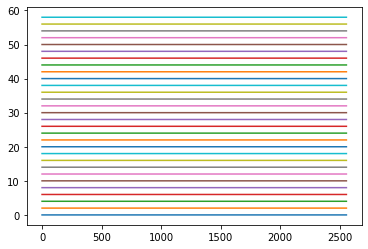

In [17]:
# Visual check for any missing data points
existing_time_ids = np.sort(df.time_id.unique())
arr_missing = np.full((len(existing_time_ids), 1 + len(STOCK_NAMES)), True)
for i, row in tqdm(df.iterrows()):
    # import pdb; pdb.set_trace()
    ind_time_id = list(existing_time_ids).index(row.time_id)
    ind_stock = 1 + STOCK_NAMES.index(row.tic)
    arr_missing[ind_time_id, ind_stock] = False

for i in range(len(STOCK_NAMES)):
    num_missing = np.sum(arr_missing[:, 1 + i])
    if num_missing != 0:
        print(f'{STOCK_NAMES[i]} has {num_missing} missing points.')

for i in range(len(STOCK_NAMES)):
    plt.plot(2 * i + arr_missing[:, i + 1])

Confirmed no missing data!

In [18]:
# now, save into a dataframe
res = pd.DataFrame(
    columns = (
        ['time_id'] 
        + STOCK_NAMES 
        + [f'{name}_macd' for name in STOCK_NAMES]
        + [f'{name}_rsi' for name in STOCK_NAMES]
        + [f'{name}_cci' for name in STOCK_NAMES]
        + [f'{name}_adx' for name in STOCK_NAMES]
    ), 
    dtype = float,
)
res['time_id'] = np.sort(df.time_id.unique())

In [19]:
res

,time_id,MMM,AA,AXP,T,BAC,BA,CAT,CVX,CSCO,...,MRK_adx,MSFT_adx,PFE_adx,PG_adx,TRV_adx,UNH_adx,RTX_adx,VZ_adx,WMT_adx,DIS_adx
0,-60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553,3644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2554,3646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2555,3647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2556,3650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# populate closing prices
time_id_to_ind = {t: i for i, t in enumerate(existing_time_ids)}

for i, row in tqdm(df.iterrows()):
    ind_time_id = time_id_to_ind[row.time_id]
    ind_stock = 1 + STOCK_NAMES.index(row.tic)
    res.iloc[ind_time_id, ind_stock] = row.adjcp

76740it [00:24, 3156.22it/s]


In [21]:
# populate technical indicators
df_adjcp = df.copy()
df_adjcp['close'] = df_adjcp.adjcp
sdf = StockDataFrame.retype(df_adjcp)
for name in tqdm(STOCK_NAMES):
    res[f'{name}_macd'] = np.array(sdf[sdf.tic == name]['macd'])
    res[f'{name}_rsi'] = np.array(sdf[sdf.tic == name]['rsi_30'])


# cci and adx need to be calculated with regular close price (not adjcp)
df_regcp = df.copy()
df_regcp['close'] = df_regcp.regcp
sdf = StockDataFrame.retype(df_regcp)
for name in tqdm(STOCK_NAMES):
    res[f'{name}_cci'] = np.array(sdf[sdf.tic == name]['cci_30'])
    res[f'{name}_adx'] = np.array(sdf[sdf.tic == name]['dx_30'])

100%|██████████| 30/30 [00:30<00:00,  1.03s/it]


In [23]:
res

,time_id,MMM,AA,AXP,T,BAC,BA,CAT,CVX,CSCO,...,MRK_adx,MSFT_adx,PFE_adx,PG_adx,TRV_adx,UNH_adx,RTX_adx,VZ_adx,WMT_adx,DIS_adx
0,-60,52.730476,27.590992,29.772829,12.624655,12.492840,37.285347,39.919525,46.566685,16.746969,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-59,52.574287,27.988941,30.073219,12.511183,12.638007,37.154026,40.617336,46.603138,16.681440,...,100.000000,NaN,100.000000,NaN,100.000000,100.000000,100.000000,100.000000,100.000000,NaN
2,-58,52.581387,27.723009,30.006458,12.595054,12.552611,37.457939,40.444679,46.347958,16.958128,...,42.936901,100.000000,43.288860,100.000000,64.831836,100.000000,100.000000,100.000000,100.000000,100.000000
3,-57,53.568130,28.565117,31.491783,12.797324,12.919799,38.782635,41.718014,46.931259,17.424133,...,55.497039,100.000000,24.894026,100.000000,63.567986,100.000000,100.000000,19.532893,100.000000,100.000000
4,-56,53.532623,28.565117,31.049501,12.792391,12.851484,38.712505,41.437450,47.107464,17.344036,...,40.146592,83.610836,24.894026,100.000000,81.933171,100.000000,100.000000,25.057558,100.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553,3644,163.516312,21.509222,120.836693,33.261116,33.488522,331.030457,139.560364,107.090584,44.613712,...,37.448529,38.404449,32.576988,20.210655,1.473090,57.207906,26.421881,12.121247,10.134192,2.857569
2554,3646,163.433044,21.379648,121.485733,33.431866,33.773777,327.968689,140.260635,107.321968,44.679081,...,37.448529,43.153869,35.502188,24.297597,1.473090,57.767307,28.940466,12.121247,12.625788,5.457394
2555,3647,164.053131,21.509222,121.272614,33.500160,33.612137,328.187408,140.317398,107.055008,44.604382,...,37.448529,46.686622,36.632537,29.146971,5.848045,58.148112,30.726347,16.791689,13.548236,9.376373
2556,3650,162.729675,21.270010,120.410469,33.329418,33.421967,324.469513,139.598221,106.654533,44.436302,...,27.653984,30.887127,20.393647,11.754903,1.598061,50.088175,25.610056,12.694190,11.864995,4.034837


In [24]:
# shave off the buffer period
res = res[res.time_id >= 0].reset_index(drop=True)

In [25]:
res[['time_id', f'{name}_macd', f'{name}_rsi', f'{name}_cci', f'{name}_adx']]

,time_id,DIS_macd,DIS_rsi,DIS_cci,DIS_adx
0,3,0.414838,64.844112,73.685172,19.177827
1,4,0.379022,64.059902,46.756748,12.880009
2,5,0.335166,62.400850,33.296838,12.134781
3,6,0.297664,62.460041,22.397457,6.856144
4,7,0.268276,62.763091,22.912695,9.459604
...,...,...,...,...,...
2511,3644,1.084009,55.269339,-95.631646,2.857569
2512,3646,0.957071,55.778291,-99.294296,5.457394
2513,3647,0.850700,55.841680,-86.460110,9.376373
2514,3650,0.599718,52.744619,-146.138526,4.034837


In [26]:
res

,time_id,MMM,AA,AXP,T,BAC,BA,CAT,CVX,CSCO,...,MRK_adx,MSFT_adx,PFE_adx,PG_adx,TRV_adx,UNH_adx,RTX_adx,VZ_adx,WMT_adx,DIS_adx
0,3,59.318882,36.897533,34.145298,14.099751,13.406422,43.777550,42.120872,48.459885,17.977516,...,16.724884,16.111967,20.209763,37.902635,10.423187,20.510798,21.980899,19.314513,5.740780,19.177827
1,4,58.947323,35.745182,34.070206,14.030677,13.842196,45.211346,42.624470,48.803139,17.897413,...,20.618439,16.111967,20.209763,38.367566,27.489468,25.912007,21.980899,5.511654,3.157418,12.880009
2,5,59.783329,37.606667,34.620930,13.825376,14.004539,46.582806,42.753952,48.809265,17.780920,...,25.809583,11.423569,17.875086,39.968929,40.025393,27.198300,17.322267,24.143410,0.731425,12.134781
3,6,59.826176,36.808880,35.182430,13.670149,14.465947,48.468555,42.926609,48.625378,17.861012,...,28.830251,0.398988,14.893353,44.012043,30.540455,39.540728,9.125039,29.942408,4.822540,6.856144
4,7,60.247746,37.717480,35.157299,13.570002,14.337780,48.001007,43.408607,48.711212,17.955667,...,28.830251,5.450427,16.695360,46.670174,30.540455,39.540728,10.290304,32.199704,10.722173,9.459604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,3644,163.516312,21.509222,120.836693,33.261116,33.488522,331.030457,139.560364,107.090584,44.613712,...,37.448529,38.404449,32.576988,20.210655,1.473090,57.207906,26.421881,12.121247,10.134192,2.857569
2512,3646,163.433044,21.379648,121.485733,33.431866,33.773777,327.968689,140.260635,107.321968,44.679081,...,37.448529,43.153869,35.502188,24.297597,1.473090,57.767307,28.940466,12.121247,12.625788,5.457394
2513,3647,164.053131,21.509222,121.272614,33.500160,33.612137,328.187408,140.317398,107.055008,44.604382,...,37.448529,46.686622,36.632537,29.146971,5.848045,58.148112,30.726347,16.791689,13.548236,9.376373
2514,3650,162.729675,21.270010,120.410469,33.329418,33.421967,324.469513,139.598221,106.654533,44.436302,...,27.653984,30.887127,20.393647,11.754903,1.598061,50.088175,25.610056,12.694190,11.864995,4.034837


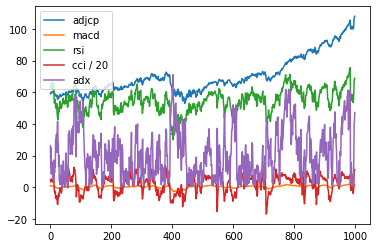

In [27]:
n = 1000
plt.plot(range(n), res.MMM[:n], label='adjcp')
plt.plot(range(n), res.MMM_macd[:n], label='macd')
plt.plot(range(n), res.MMM_rsi[:n], label='rsi')
plt.plot(range(n), res.MMM_cci[:n] / 20, label='cci / 20')
plt.plot(range(n), res.MMM_adx[:n], label='adx')
plt.legend()

In [28]:
res.to_csv('stocks_data.csv', index=False)